In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error, r2_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import randint
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score,accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pickle
from scikitplot.metrics import plot_roc_curve, confusion_matrix

# Preprocessing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,  accuracy_score
from sklearn.model_selection import KFold

#Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score,  RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import RidgeClassifier

# Data visualization
import cufflinks as cf
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc_curve, confusion_matrix
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns
import plotly.offline as pyo


# Misc
from warnings import filterwarnings

cf.go_offline()
filterwarnings("ignore")
pd.set_option("display.max_columns", 50)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

In [2]:
def metricas(model,Xv,yv):
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))
    print(classification_report(yv,model.predict(Xv)))

In [4]:
x_train=pd.read_csv("./xs.csv")
x_test=pd.read_csv("./xs_test.csv")
y_train=pd.read_csv("./y_train.csv")
y_test=pd.read_csv("./y_test.csv")
xs_validate=pd.read_csv("./xs_validate.csv")
validate_local=pd.read_csv('./validate_local_id.csv')
validate_visit=pd.read_csv('./validate_visit_id.csv')
clubs=pd.read_csv('./clubs.csv')


In [5]:
x_train

,season,attendance,own_position,opponent_position,casa_goles_anteriores,casa_goles_anteriores_recibidos,casa_minuto_primer_gol_anterior,casa_minuto_ultimo_gol_anterior,casa_number_goals_anterior,casa_sustituciones_anterior,casa_goles_tiempo_añadido_anterior,visita_goles_anteriores_recibidos,visita_goles_anteriores,visita_minuto_primer_gol_anterior,visita_minuto_ultimo_gol_anterior,visita_number_goals_anterior,visita_sustituciones_anterior,visita_goles_tiempo_añadido_anterior,casa_goles_anteriores_2,casa_goles_anteriores_recibidos_2,casa_minuto_primer_gol_anterior_2,casa_minuto_ultimo_gol_anterior_2,casa_number_goals_anterior_2,casa_sustituciones_anterior_2,casa_goles_tiempo_añadido_anterior_2,...,domestic_competition_id_local_ES1,domestic_competition_id_local_FR1,domestic_competition_id_local_GB1,domestic_competition_id_local_GR1,domestic_competition_id_local_IT1,domestic_competition_id_local_L1,domestic_competition_id_local_NL1,domestic_competition_id_local_PO1,domestic_competition_id_local_RU1,domestic_competition_id_local_SC1,domestic_competition_id_local_TR1,domestic_competition_id_local_UKR1,domestic_competition_id_visit_DK1,domestic_competition_id_visit_ES1,domestic_competition_id_visit_FR1,domestic_competition_id_visit_GB1,domestic_competition_id_visit_GR1,domestic_competition_id_visit_IT1,domestic_competition_id_visit_L1,domestic_competition_id_visit_NL1,domestic_competition_id_visit_PO1,domestic_competition_id_visit_RU1,domestic_competition_id_visit_SC1,domestic_competition_id_visit_TR1,domestic_competition_id_visit_UKR1
0,0.64,0.24,0.86,0.50,0.00,0.12,0.07,0.51,0.15,0.40,0.00,0.14,0.06,0.02,0.74,0.18,0.40,0.09,0.07,0.06,0.52,0.60,0.12,0.40,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.36,0.06,0.45,0.64,0.00,0.00,0.00,0.00,0.00,0.40,0.09,0.07,0.06,0.34,0.52,0.12,0.40,0.00,0.13,0.06,0.30,0.70,0.18,0.40,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,0.45,0.02,0.23,0.64,0.27,0.00,0.55,0.74,0.31,0.40,0.09,0.07,0.06,0.25,0.45,0.12,0.40,0.00,0.27,0.00,0.05,0.54,0.24,0.40,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.73,0.03,0.68,0.32,0.20,0.06,0.04,0.40,0.31,0.40,0.00,0.14,0.06,0.05,0.61,0.18,0.40,0.00,0.13,0.06,0.05,0.61,0.18,0.40,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,0.73,0.10,0.73,0.36,0.20,0.00,0.13,0.59,0.23,0.40,0.09,0.21,0.06,0.31,0.77,0.24,0.40,0.18,0.20,0.19,0.02,0.77,0.35,0.40,0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73277,0.27,0.40,0.64,0.77,0.13,0.12,0.12,0.40,0.31,0.33,0.09,0.07,0.06,0.09,0.50,0.12,0.40,0.00,0.07,0.06,0.09,0.50,0.12,0.40,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
73278,0.45,0.23,0.00,0.00,0.07,0.06,0.30,0.68,0.15,0.33,0.00,0.14,0.06,0.02,0.38,0.18,0.40,0.09,0.00,0.12,0.59,0.58,0.12,0.40,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
73279,0.45,0.05,0.64,0.77,0.07,0.31,0.05,0.72,0.46,0.40,0.00,0.14,0.06,0.31,0.73,0.18,0.40,0.09,0.13,0.06,0.31,0.73,0.18,0.40,0.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
73280,0.45,0.09,0.32,0.09,0.07,0.12,0.33,0.66,0.23,0.40,0.00,0.00,0.06,0.44,0.43,0.06,0.40,0.09,0.00,0.25,0.07,0.62,0.24,0.40,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

# Seleccion de variables 

In [6]:
kb=SelectKBest(k=30, score_func=f_classif)


In [7]:
#El fit se aplica sobre el conjunto de entramiento (TRAIN)
# Conjunto TRAIN es la base para todo
kb.fit(x_train,y_train)
ls_best=[x for x, y in zip(x_train.columns, kb.get_support()) if y]
ls_best

['attendance',
 'own_position',
 'opponent_position',
 'visita_goles_anteriores_recibidos',
 'visita_goles_anteriores',
 'visita_minuto_primer_gol_anterior',
 'visita_minuto_ultimo_gol_anterior',
 'visita_number_goals_anterior',
 'visita_sustituciones_anterior',
 'visita_goles_tiempo_añadido_anterior',
 'visita_number_goals_anterior_2',
 'suma_goles_recibidos',
 'suma_goles_anotados',
 'total_de_goles_anterior_visita',
 'anotado_local_recibido_visita',
 'anotado_visita_recibido_local',
 'diferencia_sustituciones',
 'suma_goles_anotados_2',
 'total_de_goles_anterior_casa_2',
 'total_de_goles_anterior_visita_2',
 'anotado_visita_recibido_local_2',
 'suma_goles_anotados_3',
 'anotado_visita_recibido_local_3',
 'visita_victoria_local_partidoanterior',
 'over_2_anterior_visita',
 'domestic_competition_id_local_GR1',
 'domestic_competition_id_local_NL1',
 'domestic_competition_id_visit_GR1',
 'domestic_competition_id_visit_L1',
 'domestic_competition_id_visit_NL1']

In [9]:
x_train=x_train[ls_best]
x_test=x_test[ls_best]
xs_validate=xs_validate[ls_best]

# Regresion Logistica 

In [10]:
model=LogisticRegression(solver='liblinear')



In [11]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [12]:
metricas(model,x_test,y_test)

 Roc Validate: 0.824
 Acc Validate: 0.736
 Matrix Conf Validate:  
 [[12765  4747]
 [ 4914 14216]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     17512
           1       0.75      0.74      0.75     19130

    accuracy                           0.74     36642
   macro avg       0.74      0.74      0.74     36642
weighted avg       0.74      0.74      0.74     36642



In [13]:
metricas(model,x_train,y_train)

 Roc Validate: 0.823
 Acc Validate: 0.737
 Matrix Conf Validate:  
 [[25798  9474]
 [ 9806 28204]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     35272
           1       0.75      0.74      0.75     38010

    accuracy                           0.74     73282
   macro avg       0.74      0.74      0.74     73282
weighted avg       0.74      0.74      0.74     73282



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

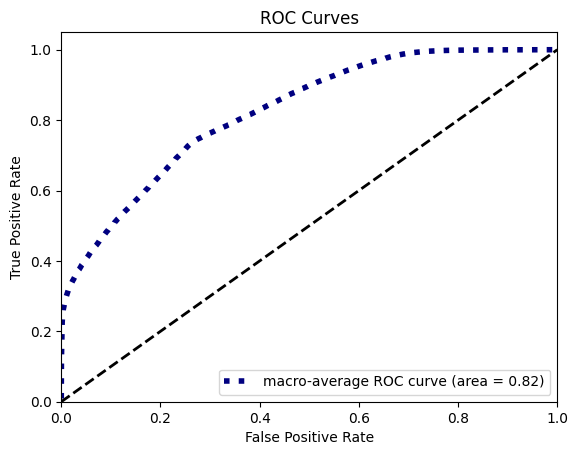

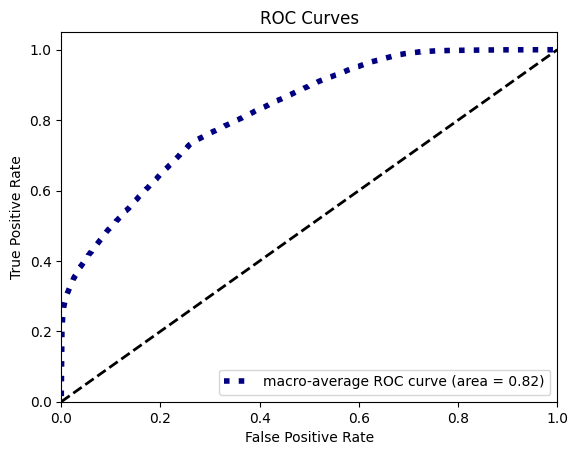

In [14]:
plot_roc_curve(y_probas=model.predict_proba(x_train),y_true=y_train,curves='macro')
plot_roc_curve(y_probas=model.predict_proba(x_test),y_true=y_test,curves='macro')

In [15]:
y_pred=pd.DataFrame(model.predict(x_test))

In [16]:
prediccion=y_test.copy()
prediccion['log_r']=model.predict(x_test)
prediccion.reset_index(drop=True, inplace=True)
prediccion

,over_2,log_r
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
36637,0,0
36638,1,1
36639,1,1
36640,1,1


In [17]:
confusion_matrix(y_test, y_pred)

array([[12765,  4747],
       [ 4914, 14216]])

In [18]:
predicciones=pd.DataFrame()
predicciones["y_real"]=y_test
predicciones['y_predicha']=y_pred
# Obtener las variables objetivo real y predicha del DataFrame
y_real = predicciones['y_real'].tolist()
y_predicha = predicciones['y_predicha'].tolist()

# Definir la cantidad de puntos a mostrar
n_points =100  # Número de puntos que se mostrarán en el gráfico

# Muestreo aleatorio de los puntos
indices = np.random.choice(len(y_real), size=n_points, replace=False)

# Crear el gráfico de dispersión interactivo con los puntos muestreados
scatter_real = go.Scatter(x=indices, y=np.array(y_real)[indices], mode='markers', name='Real', marker=dict(color='blue', size=5))
scatter_predicha = go.Scatter(x=indices, y=np.array(y_predicha)[indices], mode='markers', name='Predicha', marker=dict(color='red', size=5))

# Configurar el diseño del gráfico
layout = go.Layout(
    title='Variable Objetivo Real vs. Variable Objetivo Predicha',
    xaxis=dict(title='Índice'),
    yaxis=dict(title='Variable Objetivo'),
    showlegend=True  # Mostrar la leyenda
)

# Crear la figura del gráfico y agregar los trazados
fig = go.Figure(data=[scatter_real, scatter_predicha], layout=layout)
fig.update_layout(width=800, height=600)

# Mostrar el gráfico interactivo
iplot(fig)

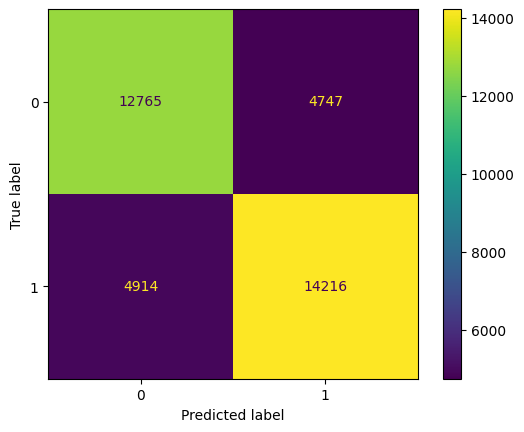

In [19]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# XGboost

In [20]:

param_grid= {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [21]:
grid_xgb = RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=param_grid,
                        cv=4,
                        scoring='roc_auc',
                        return_train_score=True,
                        n_jobs=-1,
                        verbose=1)
grid_xgb.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [22]:
best_xgb=grid_xgb.best_estimator_

In [23]:
metricas(best_xgb,x_test,y_test)

 Roc Validate: 0.875
 Acc Validate: 0.765
 Matrix Conf Validate:  
 [[13009  4503]
 [ 4125 15005]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     17512
           1       0.77      0.78      0.78     19130

    accuracy                           0.76     36642
   macro avg       0.76      0.76      0.76     36642
weighted avg       0.76      0.76      0.76     36642



In [24]:
metricas(best_xgb,x_train,y_train)

 Roc Validate: 0.892
 Acc Validate: 0.782
 Matrix Conf Validate:  
 [[26998  8274]
 [ 7668 30342]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     35272
           1       0.79      0.80      0.79     38010

    accuracy                           0.78     73282
   macro avg       0.78      0.78      0.78     73282
weighted avg       0.78      0.78      0.78     73282



In [25]:
y_pred=best_xgb.predict(x_test)
prediccion=y_test.copy()
prediccion['Xg_boost']=best_xgb.predict(x_test)
prediccion.reset_index(drop=True, inplace=True)
prediccion

,over_2,Xg_boost
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
36637,0,0
36638,1,1
36639,1,1
36640,1,1


In [26]:
predicciones=pd.DataFrame()
predicciones["y_real"]=y_test
predicciones['y_predicha']=y_pred
# Obtener las variables objetivo real y predicha del DataFrame
y_real = predicciones['y_real'].tolist()
y_predicha = predicciones['y_predicha'].tolist()

# Definir la cantidad de puntos a mostrar
n_points =100  # Número de puntos que se mostrarán en el gráfico

# Muestreo aleatorio de los puntos
indices = np.random.choice(len(y_real), size=n_points, replace=False)

# Crear el gráfico de dispersión interactivo con los puntos muestreados
scatter_real = go.Scatter(x=indices, y=np.array(y_real)[indices], mode='markers', name='Real', marker=dict(color='blue', size=5))
scatter_predicha = go.Scatter(x=indices, y=np.array(y_predicha)[indices], mode='markers', name='Predicha', marker=dict(color='red', size=5))

# Configurar el diseño del gráfico
layout = go.Layout(
    title='Variable Objetivo Real vs. Variable Objetivo Predicha',
    xaxis=dict(title='Índice'),
    yaxis=dict(title='Variable Objetivo'),
    showlegend=True  # Mostrar la leyenda
)

# Crear la figura del gráfico y agregar los trazados
fig = go.Figure(data=[scatter_real, scatter_predicha], layout=layout)
fig.update_layout(width=800, height=600)

# Mostrar el gráfico interactivo
iplot(fig)

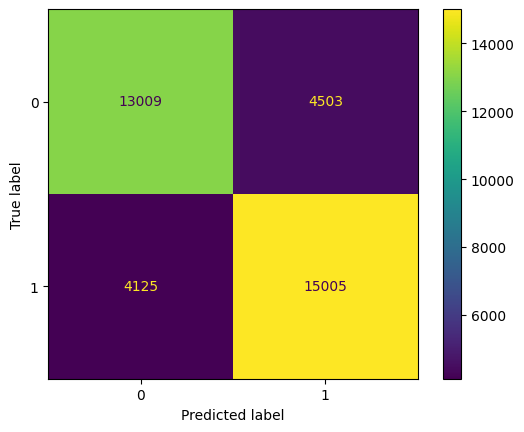

In [27]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

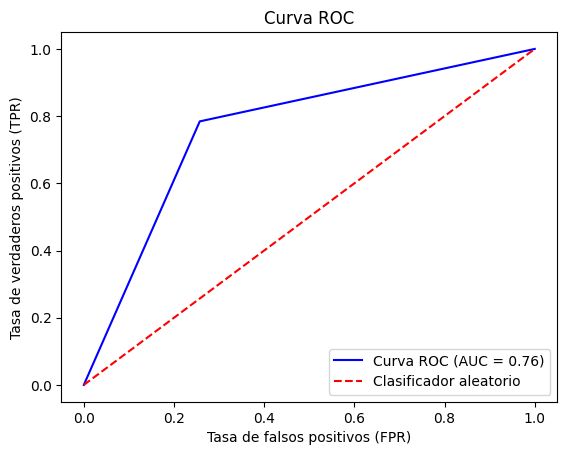

In [28]:
# Calcular TPR y FPR
fpr, tpr, thresholds = roc_curve(predicciones["y_real"], predicciones["y_predicha"])

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

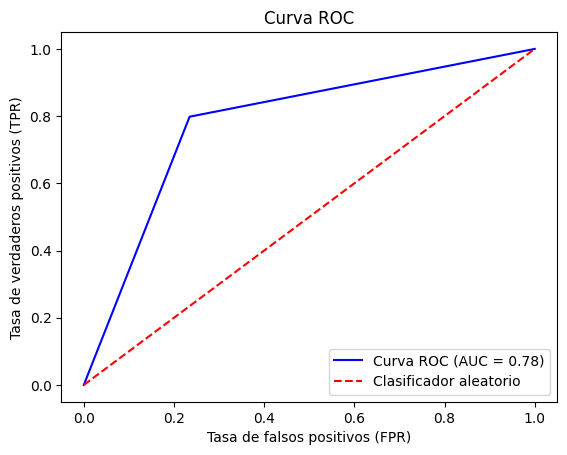

In [29]:
# Calcular TPR y FPR
fpr, tpr, thresholds = roc_curve(y_train, best_xgb.predict(x_train))

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# SGDC 

In [30]:

cv = KFold(n_splits=4,random_state=0,shuffle=True)
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}
n_hyper = np.prod(list(map(len, param_grid.values())))

In [31]:
%%time
model = SGDClassifier()
hyper = GridSearchCV(estimator=model, n_jobs=-1, scoring="roc_auc", param_grid=param_grid, error_score=-1000, verbose=1, cv = cv)
hyper.fit(x_train, y_train.values.ravel())
best_SGDC=hyper.best_estimator_

Fitting 4 folds for each of 1215 candidates, totalling 4860 fits


/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was depreca

CPU times: user 18.1 s, sys: 3.29 s, total: 21.4 s
Wall time: 10min 48s


In [32]:
hyper.best_estimator_

SGDClassifier(l1_ratio=0.75, loss='modified_huber', max_iter=3000, penalty='l1',
              tol=1e-05)

In [33]:
metricas(best_SGDC,x_test,y_test)

 Roc Validate: 0.827
 Acc Validate: 0.749
 Matrix Conf Validate:  
 [[12924  4588]
 [ 4609 14521]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     17512
           1       0.76      0.76      0.76     19130

    accuracy                           0.75     36642
   macro avg       0.75      0.75      0.75     36642
weighted avg       0.75      0.75      0.75     36642



In [34]:
metricas(best_SGDC,x_train,y_train)

 Roc Validate: 0.826
 Acc Validate: 0.749
 Matrix Conf Validate:  
 [[26080  9192]
 [ 9185 28825]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     35272
           1       0.76      0.76      0.76     38010

    accuracy                           0.75     73282
   macro avg       0.75      0.75      0.75     73282
weighted avg       0.75      0.75      0.75     73282



In [35]:
predicciones=pd.DataFrame()
predicciones["y_real"]=y_test
predicciones['y_predicha']=best_SGDC.predict(x_test)
# Obtener las variables objetivo real y predicha del DataFrame
y_real = predicciones['y_real'].tolist()
y_predicha = predicciones['y_predicha'].tolist()

# Definir la cantidad de puntos a mostrar
n_points =100  # Número de puntos que se mostrarán en el gráfico

# Muestreo aleatorio de los puntos
indices = np.random.choice(len(y_real), size=n_points, replace=False)

# Crear el gráfico de dispersión interactivo con los puntos muestreados
scatter_real = go.Scatter(x=indices, y=np.array(y_real)[indices], mode='markers', name='Real', marker=dict(color='blue', size=5))
scatter_predicha = go.Scatter(x=indices, y=np.array(y_predicha)[indices], mode='markers', name='Predicha', marker=dict(color='red', size=5))

# Configurar el diseño del gráfico
layout = go.Layout(
    title='Variable Objetivo Real vs. Variable Objetivo Predicha',
    xaxis=dict(title='Índice'),
    yaxis=dict(title='Variable Objetivo'),
    showlegend=True  # Mostrar la leyenda
)

# Crear la figura del gráfico y agregar los trazados
fig = go.Figure(data=[scatter_real, scatter_predicha], layout=layout)
fig.update_layout(width=800, height=600)

# Mostrar el gráfico interactivo
iplot(fig)

In [36]:
y_pred=best_SGDC.predict(x_test)
prediccion=y_test.copy()
prediccion['SDGC']=best_SGDC.predict(x_test)
prediccion.reset_index(drop=True, inplace=True)
prediccion

,over_2,SDGC
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
36637,0,0
36638,1,1
36639,1,1
36640,1,1


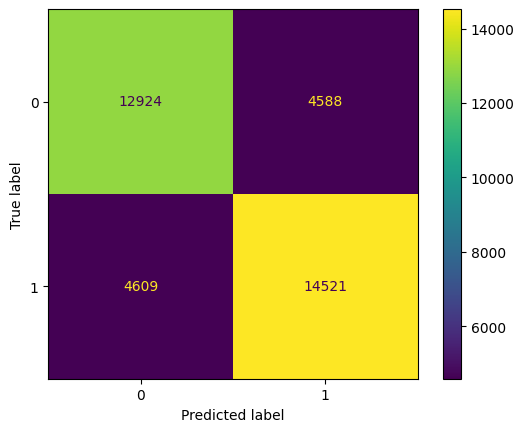

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

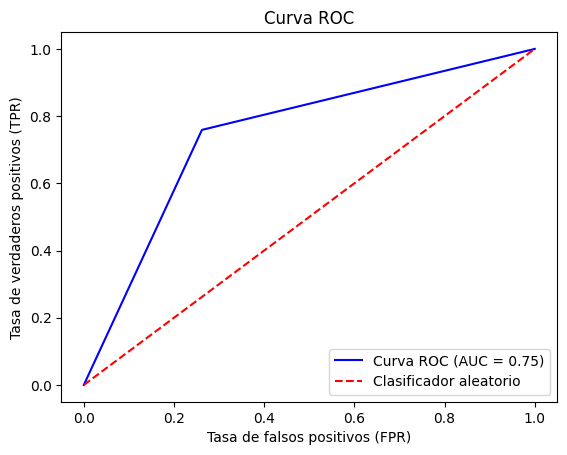

In [38]:
# Calcular TPR y FPR
fpr, tpr, thresholds = roc_curve(predicciones["y_real"], predicciones["y_predicha"])

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

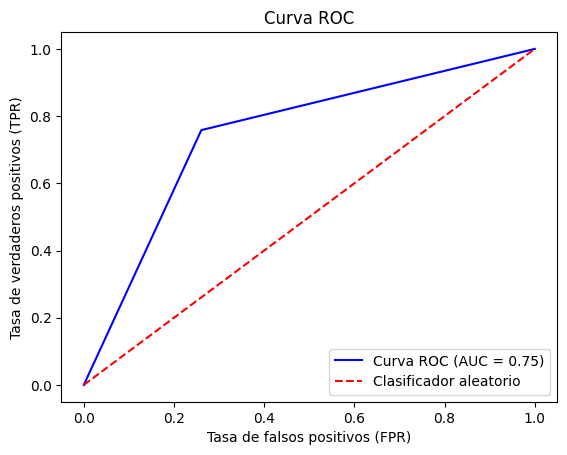

In [39]:
# Calcular TPR y FPR
fpr, tpr, thresholds = roc_curve(y_train, best_SGDC.predict(x_train))

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Ridge Classifier

In [40]:
ridge=RidgeClassifier()
parameters = {
    'alpha': [0.1, 1.0, 10.0],  # Parámetro de regularización (mayor valor para una regularización más fuerte)
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Método de solución de la regresión ridge
    'fit_intercept': [True, False],  # Especifica si se debe ajustar una intersección en el modelo

}
grid_search = GridSearchCV( estimator=ridge, n_jobs=-1, scoring="roc_auc", param_grid=parameters, error_score=-1000, verbose=1, cv = cv)
grid_search.fit(x_train, y_train.values.ravel())
Ridge_best=grid_search.best_estimator_

Fitting 4 folds for each of 42 candidates, totalling 168 fits


In [41]:
grid_search.best_estimator_

RidgeClassifier(alpha=0.1, solver='lsqr')

In [42]:
print(classification_report(y_test, Ridge_best.predict(x_test)))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     17512
           1       0.76      0.76      0.76     19130

    accuracy                           0.75     36642
   macro avg       0.75      0.75      0.75     36642
weighted avg       0.75      0.75      0.75     36642



In [43]:
print(classification_report(y_train, Ridge_best.predict(x_train)))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     35272
           1       0.76      0.76      0.76     38010

    accuracy                           0.75     73282
   macro avg       0.75      0.75      0.75     73282
weighted avg       0.75      0.75      0.75     73282



In [44]:
confusion_matrix(y_test, Ridge_best.predict(x_test))

array([[12972,  4540],
       [ 4591, 14539]])

In [45]:
confusion_matrix(y_train, Ridge_best.predict(x_train))

array([[26181,  9091],
       [ 9165, 28845]])

In [46]:
predicciones=pd.DataFrame()
predicciones["y_real"]=y_test
predicciones['y_predicha']=Ridge_best.predict(x_test)
# Obtener las variables objetivo real y predicha del DataFrame
y_real = predicciones['y_real'].tolist()
y_predicha = predicciones['y_predicha'].tolist()

# Definir la cantidad de puntos a mostrar
n_points =100  # Número de puntos que se mostrarán en el gráfico

# Muestreo aleatorio de los puntos
indices = np.random.choice(len(y_real), size=n_points, replace=False)

# Crear el gráfico de dispersión interactivo con los puntos muestreados
scatter_real = go.Scatter(x=indices, y=np.array(y_real)[indices], mode='markers', name='Real', marker=dict(color='blue', size=5))
scatter_predicha = go.Scatter(x=indices, y=np.array(y_predicha)[indices], mode='markers', name='Predicha', marker=dict(color='red', size=5))

# Configurar el diseño del gráfico
layout = go.Layout(
    title='Variable Objetivo Real vs. Variable Objetivo Predicha',
    xaxis=dict(title='Índice'),
    yaxis=dict(title='Variable Objetivo'),
    showlegend=True  # Mostrar la leyenda
)

# Crear la figura del gráfico y agregar los trazados
fig = go.Figure(data=[scatter_real, scatter_predicha], layout=layout)
fig.update_layout(width=800, height=600)

# Mostrar el gráfico interactivo
iplot(fig)

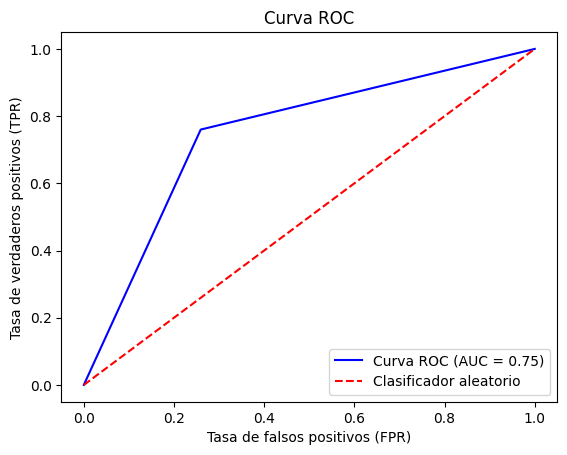

In [47]:
# Calcular TPR y FPR
fpr, tpr, thresholds = roc_curve(predicciones["y_real"], predicciones["y_predicha"])

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

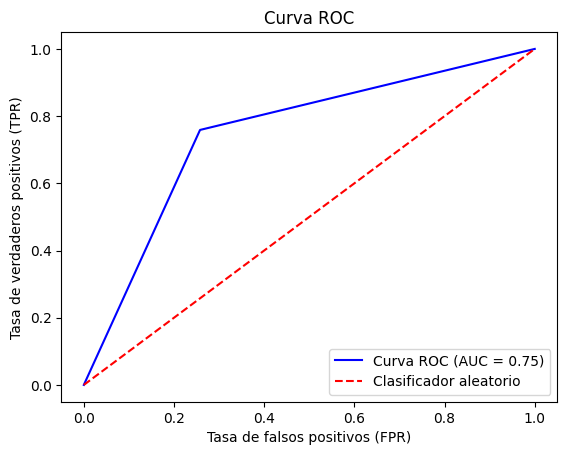

In [48]:
# Calcular TPR y FPR
fpr, tpr, thresholds = roc_curve(y_train, Ridge_best.predict(x_train))

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [49]:
y_pred=Ridge_best.predict(x_test)
prediccion=y_test.copy()
prediccion['SDGC']=Ridge_best.predict(x_test)
prediccion.reset_index(drop=True, inplace=True)
prediccion

,over_2,SDGC
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
36637,0,0
36638,1,1
36639,1,1
36640,1,1


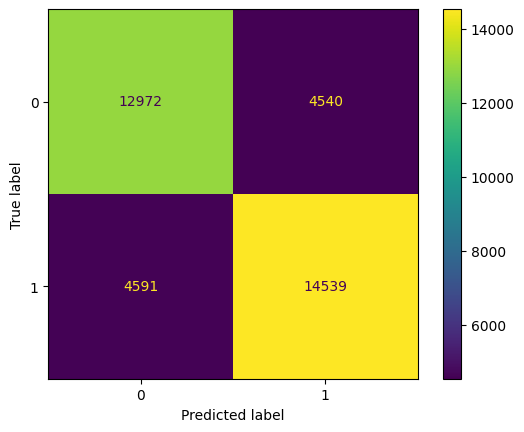

In [50]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Máquina Vector Soporte (SVM)

In [51]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [52]:
print(classification_report(y_test, svc_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     17512
           1       0.77      0.77      0.77     19130

    accuracy                           0.76     36642
   macro avg       0.76      0.76      0.76     36642
weighted avg       0.76      0.76      0.76     36642



In [53]:
print(classification_report(y_train, svc_model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     35272
           1       0.77      0.77      0.77     38010

    accuracy                           0.76     73282
   macro avg       0.76      0.76      0.76     73282
weighted avg       0.76      0.76      0.76     73282



In [54]:
confusion_matrix(y_test, svc_model.predict(x_test))

array([[13061,  4451],
       [ 4437, 14693]])

In [55]:
confusion_matrix(y_train, svc_model.predict(x_train))

array([[26350,  8922],
       [ 8842, 29168]])

In [56]:
predicciones=pd.DataFrame()
predicciones["y_real"]=y_test
predicciones['y_predicha']=svc_model.predict(x_test)
# Obtener las variables objetivo real y predicha del DataFrame
y_real = predicciones['y_real'].tolist()
y_predicha = predicciones['y_predicha'].tolist()

# Definir la cantidad de puntos a mostrar
n_points =100  # Número de puntos que se mostrarán en el gráfico

# Muestreo aleatorio de los puntos
indices = np.random.choice(len(y_real), size=n_points, replace=False)

# Crear el gráfico de dispersión interactivo con los puntos muestreados
scatter_real = go.Scatter(x=indices, y=np.array(y_real)[indices], mode='markers', name='Real', marker=dict(color='blue', size=5))
scatter_predicha = go.Scatter(x=indices, y=np.array(y_predicha)[indices], mode='markers', name='Predicha', marker=dict(color='red', size=5))

# Configurar el diseño del gráfico
layout = go.Layout(
    title='Variable Objetivo Real vs. Variable Objetivo Predicha',
    xaxis=dict(title='Índice'),
    yaxis=dict(title='Variable Objetivo'),
    showlegend=True  # Mostrar la leyenda
)

# Crear la figura del gráfico y agregar los trazados
fig = go.Figure(data=[scatter_real, scatter_predicha], layout=layout)
fig.update_layout(width=800, height=600)

# Mostrar el gráfico interactivo
iplot(fig)

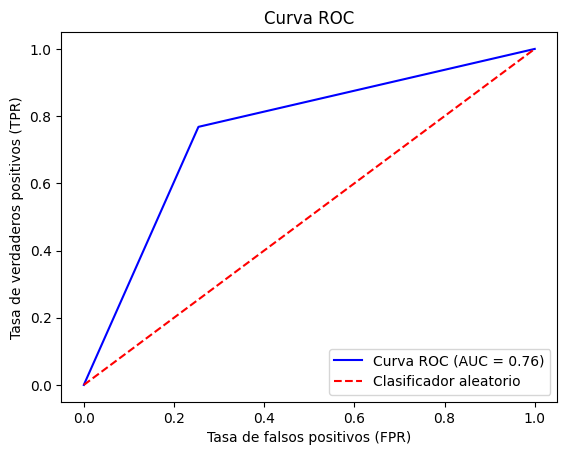

In [57]:
# Calcular TPR y FPR
fpr, tpr, thresholds = roc_curve(predicciones["y_real"], predicciones["y_predicha"])

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

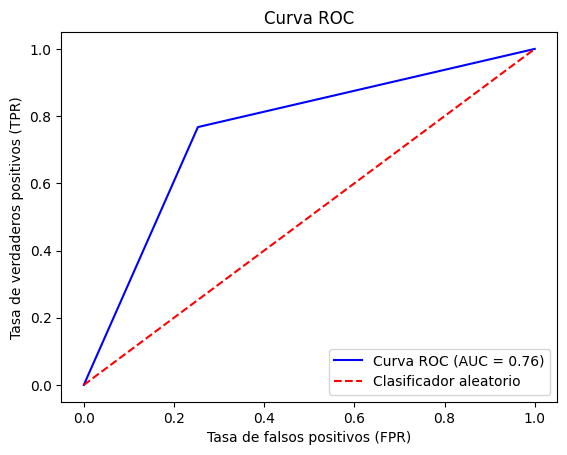

In [58]:
# Calcular TPR y FPR
fpr, tpr, thresholds = roc_curve(y_train, svc_model.predict(x_train))

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [59]:
y_pred=svc_model.predict(x_test)
prediccion=y_test.copy()
prediccion['SDGC']=svc_model.predict(x_test)
prediccion.reset_index(drop=True, inplace=True)
prediccion

,over_2,SDGC
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
36637,0,0
36638,1,1
36639,1,1
36640,1,1


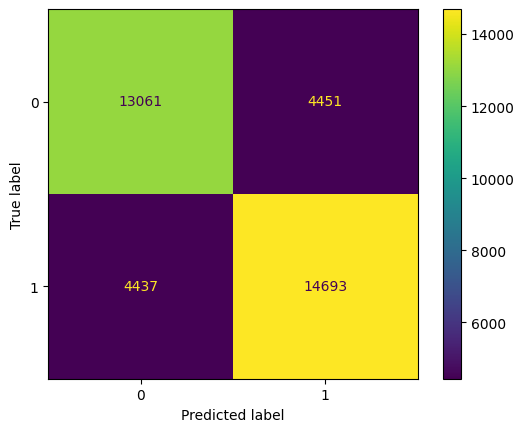

In [60]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [61]:
import pickle
#Guardar el modelo en un archivo
with open('modelo_entrenado.pkl', 'wb') as archivo:
    pickle.dump(svc_model, archivo)

# despliegue 

In [65]:
df_apuesta=pd.DataFrame()
df_apuesta['over_2.5']=svc_model.predict(xs_validate)
df_apuesta['local_id']=validate_local
df_apuesta['visit_id']=validate_visit
df_apuesta = pd.merge(df_apuesta, clubs, left_on='local_id', right_on='club_id', how='left')
df_apuesta = pd.merge(df_apuesta, clubs, left_on='visit_id', right_on='club_id', how='left')


In [66]:
df_apuesta.columns

Index(['over_2.5', 'local_id', 'visit_id', 'club_id_x', 'club_code_x',
       'name_x', 'domestic_competition_id_x', 'total_market_value_x',
       'squad_size_x', 'average_age_x', 'foreigners_number_x',
       'foreigners_percentage_x', 'national_team_players_x', 'stadium_name_x',
       'stadium_seats_x', 'net_transfer_record_x', 'coach_name_x', 'url_x',
       'club_id_y', 'club_code_y', 'name_y', 'domestic_competition_id_y',
       'total_market_value_y', 'squad_size_y', 'average_age_y',
       'foreigners_number_y', 'foreigners_percentage_y',
       'national_team_players_y', 'stadium_name_y', 'stadium_seats_y',
       'net_transfer_record_y', 'coach_name_y', 'url_y'],
      dtype='object')

In [68]:
df_apuesta=df_apuesta[['over_2.5','name_x','name_y']].dropna()

In [69]:
df_apuesta

,over_2.5,name_x,name_y
20,1,Goverla Uzhgorod,Zorya Lugansk
21,0,Silkeborg If,Odense Boldklub
22,0,Zorya Lugansk,Goverla Uzhgorod
23,0,Odense Boldklub,Silkeborg If
24,1,Dynamo Kiew,Kryvbas Kryvyi Rig
...,...,...,...
11018,0,Fc Bayern Munchen,Vfl Wolfsburg
11019,0,Psv Eindhoven,Az Alkmaar
11020,1,Sc Bastia,As Saint Etienne
11021,0,As Saint Etienne,Sc Bastia


In [70]:
df_apuesta.to_csv('./apostar.csv')